In [2]:
%pip install tensorflow matplotlib scikit-learn pydot

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [20]:
from tensorflow import keras
from keras import backend
from keras.callbacks import ModelCheckpoint
from keras.layers import Activation, Add, Dense, Input, Lambda
from keras.models import Model
import numpy as np
import requests

In [4]:
INPUT_DIM = 24
h_1_dim = 64
h_2_dim = h_1_dim // 2
h_3_dim = h_2_dim // 2

# Model.
h_1 = Dense(h_1_dim, activation = "relu")
h_2 = Dense(h_2_dim, activation = "relu")
h_3 = Dense(h_3_dim, activation = "relu")
s = Dense(1)

# Relevant document score.
rel_doc = Input(shape = (INPUT_DIM, ), dtype = "float32")
h_1_rel = h_1(rel_doc)
h_2_rel = h_2(h_1_rel)
h_3_rel = h_3(h_2_rel)
rel_score = s(h_3_rel)

# Irrelevant document score.
irr_doc = Input(shape = (INPUT_DIM, ), dtype = "float32")
h_1_irr = h_1(irr_doc)
h_2_irr = h_2(h_1_irr)
h_3_irr = h_3(h_2_irr)
irr_score = s(h_3_irr)

# Subtract scores.
negated_irr_score = Lambda(lambda x: -1 * x, output_shape = (1, ))(irr_score)
diff = Add()([rel_score, negated_irr_score])

# Pass difference through sigmoid function.
prob = Activation("sigmoid")(diff)

# Build model.
model = Model(inputs = [rel_doc, irr_doc], outputs = prob)
model.compile(optimizer = "adagrad", loss = "binary_crossentropy")

2023-01-02 14:00:18.699748: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-02 14:00:18.699916: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-02 14:00:18.700053: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (thesis-ubuntu): /proc/driver/nvidia/version does not exist
2023-01-02 14:00:18.714328: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


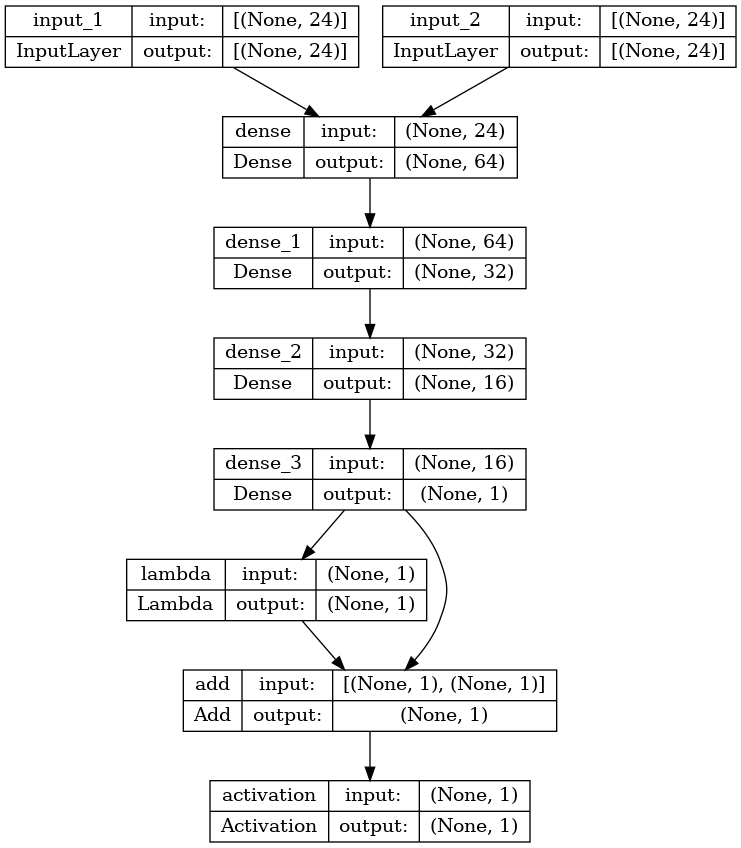

In [21]:
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [5]:
from os import listdir
from os.path import isfile, join
def getJudgmentsBatchFileByFile():
    """
    Returns a generator function that returns all the judgment batches files from the directory
    """
    files = []
   
    files = [join('./loggedFeatures', file) for file in listdir('./loggedFeatures') if isfile(join('./loggedFeatures', file))]
    for file in files:
        yield file

In [6]:
import csv
judgments = []
for file in getJudgmentsBatchFileByFile():
  with open(file,'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
      data = []
      for element in row:
        data.append(element.replace(',', ''))
      judgments.append(data)

In [7]:
judgments.sort(key = lambda judgments: judgments[1])
print(judgments[0])
print(judgments[1])
print(judgments[2])
print(judgments[3])

['1', '10000', 'msmarco_doc_10_1691063043', '1.0', '8.0', '9.0', '9.0', '0.083333336', '0.6666667', '0.75', '0.75', '1.0', '11.69213', '55.452248', '57.059895', '90.48286', '71.1965', '38.33255', '38.325306', '8.277235', '63.746307', '139.44073', '144.08391', '3.3537564', '6.161056', '2.6165454', '2.5894945']
['0', '10000', 'msmarco_doc_05_72507775', '1.0', '2.0', '8.0', '8.0', '0.083333336', '0.16666667', '0.6666667', '0.6666667', '1.0', '2.4142137', '36.53677', '36.764153', '90.48286', '71.1965', '38.33255', '38.325306', '6.947685', '9.943436', '76.099815', '76.71629', '1.4357138', '0.64040625', '0.65897375', '0.6643161']
['0', '1000005', 'msmarco_doc_10_1691063043', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.25', '0.25', '0.0', '0.0', '4.1231055', '4.1231055', '26.600231', '22.689518', '12.23183', '12.228702', '0.0', '0.0', '4.340817', '4.338505', '0.0', '0.0', '0.08145297', '0.077972166']
['1', '1000005', 'msmarco_doc_05_72507775', '2.0', '2.0', '3.0', '3.0', '0.5', '0.5', '0.75'

In [8]:
for j in judgments:
  del j[2]

print(judgments[0])
print(judgments[1])
print(judgments[2])
print(judgments[3])
print(judgments[4])
print(judgments[5])
print(judgments[6])
print(judgments[7])

['1', '10000', '1.0', '8.0', '9.0', '9.0', '0.083333336', '0.6666667', '0.75', '0.75', '1.0', '11.69213', '55.452248', '57.059895', '90.48286', '71.1965', '38.33255', '38.325306', '8.277235', '63.746307', '139.44073', '144.08391', '3.3537564', '6.161056', '2.6165454', '2.5894945']
['0', '10000', '1.0', '2.0', '8.0', '8.0', '0.083333336', '0.16666667', '0.6666667', '0.6666667', '1.0', '2.4142137', '36.53677', '36.764153', '90.48286', '71.1965', '38.33255', '38.325306', '6.947685', '9.943436', '76.099815', '76.71629', '1.4357138', '0.64040625', '0.65897375', '0.6643161']
['0', '1000005', '0.0', '0.0', '1.0', '1.0', '0.0', '0.0', '0.25', '0.25', '0.0', '0.0', '4.1231055', '4.1231055', '26.600231', '22.689518', '12.23183', '12.228702', '0.0', '0.0', '4.340817', '4.338505', '0.0', '0.0', '0.08145297', '0.077972166']
['1', '1000005', '2.0', '2.0', '3.0', '3.0', '0.5', '0.5', '0.75', '0.75', '2.0', '7.8929224', '22.769188', '24.606716', '26.600231', '22.689518', '12.23183', '12.228702', '16.6

In [9]:
#create pairs
xi = []
xj = []
pij = []
judgmentPairs = []

for i in range(1, len(judgments), 2):
  judgmentPairs.append([judgments[i - 1], judgments[i]])
  xi.append(judgments[i - 1][2:])
  xj.append(judgments[i][2:])
  if judgments[i-1][0] == judgments[i][0]:
    _pij = 0.5
  elif judgments[i-1][0] > judgments[i][0]:
    _pij = 1
  else: 
    _pij = 0
  pij.append(_pij)

In [10]:
xi = np.array(xi, dtype='float64')

In [11]:
xj = np.array(xj, dtype='float64')

In [12]:
pij = np.array(pij, dtype='float64')

In [13]:
from sklearn.model_selection import train_test_split

xi_train, xi_test, xj_train, xj_test, pij_train, pij_test = train_test_split(
    xi, xj, pij, test_size=0.2, shuffle=False)

In [17]:
NUM_EPOCHS = 30
BATCH_SIZE = 32
checkpointer = ModelCheckpoint(filepath = "training/valid_params.h5", verbose = 1, save_best_only = True)
history = model.fit([xi_train, xj_train], pij_train,
                     epochs = NUM_EPOCHS, batch_size = BATCH_SIZE, validation_data=([xi_test, xj_test], pij_test),
                     callbacks = [checkpointer])

Epoch 1/30
8288/8299 [============================>.] - ETA: 0s - loss: 0.1545
Epoch 1: val_loss improved from inf to 0.13189, saving model to training/valid_params.h5
8299/8299 [==============================] - 43s 5ms/step - loss: 0.1545 - val_loss: 0.1319
Epoch 2/30
8292/8299 [============================>.] - ETA: 0s - loss: 0.1477
Epoch 2: val_loss improved from 0.13189 to 0.12799, saving model to training/valid_params.h5
8299/8299 [==============================] - 43s 5ms/step - loss: 0.1477 - val_loss: 0.1280
Epoch 3/30
8294/8299 [============================>.] - ETA: 0s - loss: 0.1449
Epoch 3: val_loss improved from 0.12799 to 0.12626, saving model to training/valid_params.h5
8299/8299 [==============================] - 43s 5ms/step - loss: 0.1449 - val_loss: 0.1263
Epoch 4/30
8294/8299 [============================>.] - ETA: 0s - loss: 0.1432
Epoch 4: val_loss improved from 0.12626 to 0.12525, saving model to training/valid_params.h5
8299/8299 [=============================

In [22]:
import json
modelName = "thesis-ranknet"
solrModel = {"store" : "thesis-ltr",
              "name" :  modelName,
              "class" : "org.apache.solr.ltr.model.NeuralNetworkModel",
              "features" : [
                { "name" : "title_coveredQueryTerms" },
                { "name" : "headings_coveredQueryTerms" },
                { "name" : "body_coveredQueryTerms" },
                { "name" : "document_coveredQueryTerms" },
                { "name" : "title_coveredQueryTermsRatio" },
                { "name" : "headings_coveredQueryTermsRatio" },
                { "name" : "body_coveredQueryTermsRatio" },
                { "name" : "document_coveredQueryTermsRatio" },
                { "name" : "title_tf" },
                { "name" : "headings_tf" },
                { "name" : "body_tf" },
                { "name" : "document_tf" },
                { "name" : "title_idf" },
                { "name" : "headings_idf" },
                { "name" : "body_idf" },
                { "name" : "document_idf" },
                { "name" : "title_tfidf" },
                { "name" : "headings_tfidf" },
                { "name" : "body_tfidf" },
                { "name" : "document_tfidf" },
                { "name" : "title_bm25" },
                { "name" : "headings_bm25" },
                { "name" : "body_bm25" },
                { "name" : "document_bm25" }
              ],
              "params": {}}

weights = model.get_weights()

layers = []
layers.append({"matrix": weights[0].T.tolist(),
               "bias": weights[1].tolist(),
               "activation": "relu"})
layers.append({"matrix": weights[2].T.tolist(),
               "bias": weights[3].tolist(),
               "activation": "relu"})
layers.append({"matrix": weights[4].T.tolist(),
              "bias": weights[5].tolist(),
              "activation": "relu"})
layers.append({"matrix": weights[6].T.tolist(),
              "bias": weights[7].tolist(),
              "activation": "identity"})
solrModel["params"]["layers"] = layers


print(json.dumps(solrModel, indent=2))

# Upload the model after deleting the model
print('Delete')
requests.delete(f'http://localhost:8983/solr/thesis-ltr/schema/model-store/{modelName}').json()
print('Add new model')
requests.put(f'http://localhost:8983/solr/thesis-ltr/schema/model-store', json=solrModel).json()

{
  "store": "thesis-ltr",
  "name": "thesis-ranknet",
  "class": "org.apache.solr.ltr.model.NeuralNetworkModel",
  "features": [
    {
      "name": "title_coveredQueryTerms"
    },
    {
      "name": "headings_coveredQueryTerms"
    },
    {
      "name": "body_coveredQueryTerms"
    },
    {
      "name": "document_coveredQueryTerms"
    },
    {
      "name": "title_coveredQueryTermsRatio"
    },
    {
      "name": "headings_coveredQueryTermsRatio"
    },
    {
      "name": "body_coveredQueryTermsRatio"
    },
    {
      "name": "document_coveredQueryTermsRatio"
    },
    {
      "name": "title_tf"
    },
    {
      "name": "headings_tf"
    },
    {
      "name": "body_tf"
    },
    {
      "name": "document_tf"
    },
    {
      "name": "title_idf"
    },
    {
      "name": "headings_idf"
    },
    {
      "name": "body_idf"
    },
    {
      "name": "document_idf"
    },
    {
      "name": "title_tfidf"
    },
    {
      "name": "headings_tfidf"
    },
    {
      "

{'responseHeader': {'status': 0, 'QTime': 188}}